In [247]:
#Library imports

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("darkgrid")
from datetime import datetime, timedelta, date
import time
import sys
import os

In [2]:
sys.path.append(os.path.abspath(os.path.join('..')))

In [230]:
%load_ext autoreload
%autoreload 2

from helpers.db_query import *

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Flipped grades

In [203]:
%time grades_df = getFlippedGrades()

CPU times: user 40.6 ms, sys: 6.88 ms, total: 47.5 ms
Wall time: 538 ms


In [304]:
print(grades_df.shape)
grades_df.head()

(419, 5)


,AcademicYear,Grade,PlanSection,PlanCursus,AccountUserID
0,2018-2019,5.00,Informatique,IN - Bachelor 2018,46938
1,2017-2018,4.25,Génie mécanique,GM - Bachelor 2017,8402
2,2017-2018,3.25,Génie électrique et électronique,EL - Bachelor 2017,9866
3,2018-2019,5.50,Informatique,IN - Bachelor 2018,49638
4,2017-2018,3.75,Génie mécanique,GM - Bachelor 2017,11354


In [207]:
grades_df.groupby("AcademicYear").size()

AcademicYear
2017-2018     92
2018-2019    162
2019-2020    165
dtype: int64

In [258]:
grades_df.Grade.describe()

count    419.000000
mean       3.983294
std        1.192463
min        1.000000
25%        3.250000
50%        4.250000
75%        5.000000
max        6.000000
Name: Grade, dtype: float64

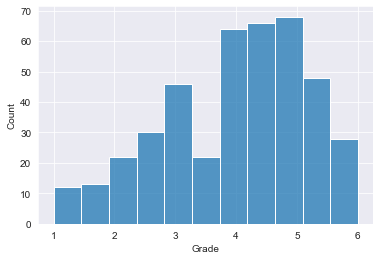

In [210]:
sns.histplot(grades_df.Grade);

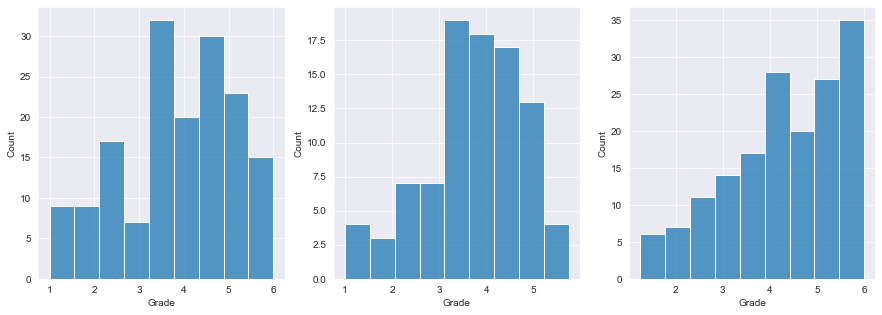

In [251]:
fig, axes = plt.subplots(1,3,figsize=(15,5))
for i, year in enumerate(grades_df.AcademicYear.unique()):
    sns.histplot(grades_df.loc[grades_df.AcademicYear == year].Grade, ax=axes[i])

# Control grades

In [219]:
%time control_grades_df = getControlGrades()

CPU times: user 35.5 ms, sys: 5.22 ms, total: 40.7 ms
Wall time: 378 ms


In [220]:
print(control_grades_df.shape)
control_grades_df.head()

(981, 4)


,AcademicYear,Grade,PlanSection,PlanCursus
0,2018-2019,4.25,Génie mécanique,GM - Bachelor 2018
1,2017-2018,3.25,Génie mécanique,GM - Bachelor 2017
2,2018-2019,5.75,Informatique,IN - Bachelor 2018
3,2017-2018,3.50,Informatique,IN - Bachelor 2017
4,2018-2019,4.50,Sciences et technologies du vivant,SV - Bachelor 2018


In [221]:
control_grades_df.groupby("AcademicYear").size()

AcademicYear
2015-2016      1
2016-2017     63
2017-2018    364
2018-2019    262
2019-2020    291
dtype: int64

In [256]:
control_grades_df.Grade.describe()

count    981.000000
mean       3.873089
std        1.161873
min        1.000000
25%        3.000000
50%        4.000000
75%        4.750000
max        6.000000
Name: Grade, dtype: float64

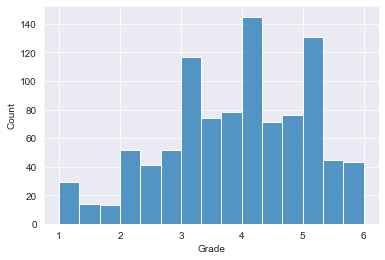

In [228]:
sns.histplot(control_grades_df.Grade);

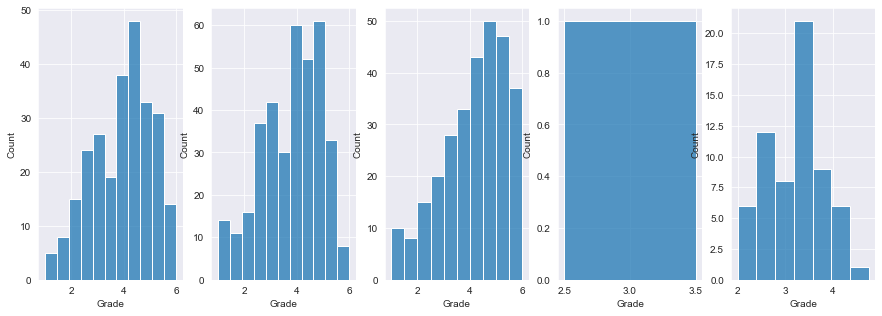

In [253]:
fig, axes = plt.subplots(1,control_grades_df.AcademicYear.nunique(),figsize=(15,5))
for i, year in enumerate(control_grades_df.AcademicYear.unique()):
    sns.histplot(control_grades_df.loc[control_grades_df.AcademicYear == year].Grade, ax=axes[i])

# Integrate only students registered on isa

In [308]:
user_id = getFlippedAccountUserID()
print(len(user_id))
user_id.head()

412


0    46938
1     8402
2     9866
3    49638
4    11354
Name: AccountUserID, dtype: object

## Videos

In [259]:
%time videos_df = getVideoEvents(with_2019=True)

CPU times: user 15 s, sys: 1.27 s, total: 16.2 s
Wall time: 19.5 s


In [293]:
%time isa_videos_df = getVideoEvents(with_2019=True, isa_only=True)

CPU times: user 16.5 s, sys: 1.26 s, total: 17.8 s
Wall time: 18.9 s


In [294]:
event_diff = len(videos_df) - len(isa_videos_df)
user_diff = videos_df.AccountUserID.nunique() - isa_videos_df.AccountUserID.nunique()
print("Filtering removed {} events and {} users".format(event_diff, user_diff))

Filtering removed 37758 events and 89 users


In [301]:
isa_videos_df.drop_duplicates("AccountUserID").groupby("Year").size()

Year
2017     91
2018    161
2019    159
dtype: int64

## Problems

In [282]:
%time problems_df = getProblemEvents()

CPU times: user 4.2 s, sys: 322 ms, total: 4.52 s
Wall time: 5.52 s


In [295]:
%time isa_problems_df = getProblemEvents(isa_only=True)

CPU times: user 4.45 s, sys: 314 ms, total: 4.77 s
Wall time: 6.48 s


In [296]:
event_diff = len(problems_df) - len(isa_problems_df)
user_diff = problems_df.AccountUserID.nunique() - isa_problems_df.AccountUserID.nunique()
print("Filtering removed {} events and {} users".format(event_diff, user_diff))

Filtering removed 8431 events and 28 users
